# Classifying IMDB movie reviews

In [1]:
import pandas as pd
import utils
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv("IMDB_Dataset.csv")
movies.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# Relabeling the 'sentiment' column as 0's and 1's
movies['sentiment'] = movies['sentiment'].map({'positive': 1, 'negative': 0})
movies.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [7]:
# Create word features (limit to top 5000 words for efficiency)
vectorizer = CountVectorizer(max_features=2000, stop_words='english')
X = vectorizer.fit_transform(movies['review'])
y = movies['sentiment']

In [5]:
# Train logistic regression (linear model for interpretable weights)
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

LogisticRegression(max_iter=1000)

In [9]:
# Get feature names (words) and their coefficients
# Note, if using a newer version of scikit-learn, change get_feature_names with get_feature_names_out
feature_names = vectorizer.get_feature_names_out()
word_weights = model.coef_[0]  # Weights for positive sentiment

# Create DataFrame of words and their sentiment scores
word_sentiments = pd.DataFrame({
    'word': feature_names,
    'weight': word_weights
})

# Sort words by sentiment strength
most_positive = word_sentiments.sort_values('weight', ascending=False).head(10)
most_negative = word_sentiments.sort_values('weight').head(10)

In [10]:
print(most_positive)
print(most_negative)

             word    weight
1964  wonderfully  1.394196
735      funniest  1.172624
747           gem  1.164801
221   brilliantly  1.111176
1707       subtle  1.084619
1720       superb  1.048474
595     excellent  1.040012
686        finest  1.013602
449    delightful  1.008638
1853   underrated  0.976981
                word    weight
1921           waste -1.910500
491   disappointment -1.697282
1977           worst -1.576324
1009       laughable -1.471803
517         dreadful -1.456577
1858         unfunny -1.455311
142            awful -1.443153
1337          poorly -1.414276
1440       redeeming -1.410530
1756         tedious -1.395041


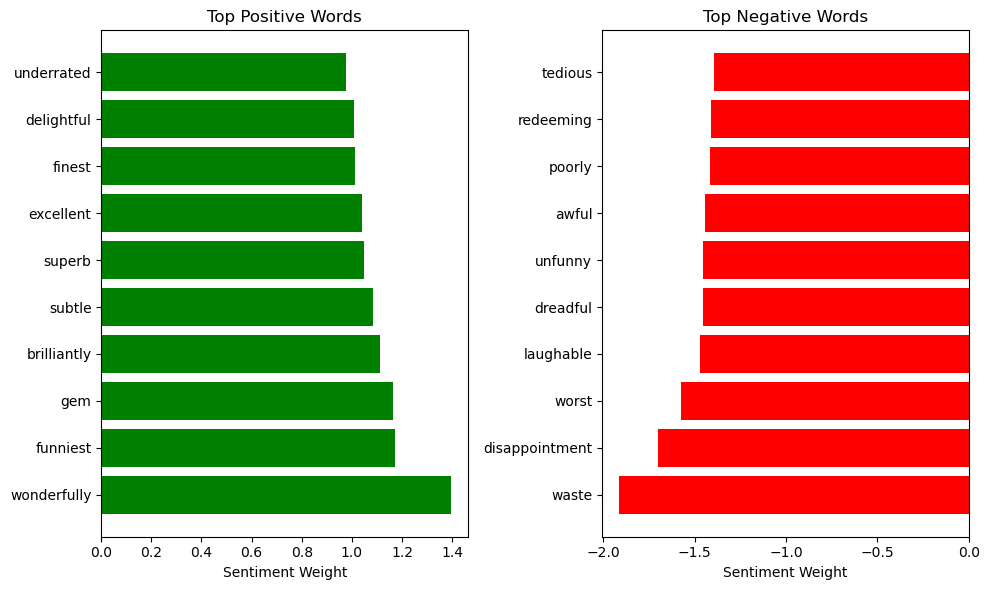

In [11]:
# Plot top positive/negative words
plt.figure(figsize=(10, 6))

# Positive words
plt.subplot(121)
plt.barh(most_positive['word'], most_positive['weight'], color='green')
plt.title('Top Positive Words')
plt.xlabel('Sentiment Weight')

# Negative words
plt.subplot(122)
plt.barh(most_negative['word'], most_negative['weight'], color='red')
plt.title('Top Negative Words')
plt.xlabel('Sentiment Weight')

plt.tight_layout()
plt.show()

In [12]:
# Predict sentiment scores for all reviews
predictions = model.predict_proba(X)[:, 1]  # Probability of positive sentiment

# Add scores to the DataFrame
movies['predictions'] = predictions

# Find the most positive and negative reviews
most_positive_review = movies.sort_values('predictions', ascending=False).head(1)
most_negative_review = movies.sort_values('predictions').head(1)

print("Most Positive Review:")
display(most_positive_review)

print("\nMost Negative Review:")
display(most_negative_review)

Most Positive Review:


,review,sentiment,predictions
42946,By now you've probably heard a bit about the n...,1,1.0



Most Negative Review:


,review,sentiment,predictions
13452,Zombi 3 starts as a group of heavily armed men...,0,2.702070e-17


In [13]:
print(most_positive_review['review'].iloc[0])

By now you've probably heard a bit about the new Disney dub of Miyazaki's classic film, Laputa: Castle In The Sky. During late summer of 1998, Disney released "Kiki's Delivery Service" on video which included a preview of the Laputa dub saying it was due out in "1999". It's obviously way past that year now, but the dub has been finally completed. And it's not "Laputa: Castle In The Sky", just "Castle In The Sky" for the dub, since Laputa is not such a nice word in Spanish (even though they use the word Laputa many times throughout the dub). You've also probably heard that world renowned composer, Joe Hisaishi, who scored the movie originally, went back to rescore the excellent music with new arrangements. Laputa came out before My Neighbor Totoro and after Nausicaa of the Valley of the Wind, which began Studio Ghibli and it's long string of hits. And in my opinion, I think it's one of Miyazaki's best films with a powerful lesson tuckered inside this two hour and four minute gem. Laputa

In [27]:
print(most_negative_review['review'].iloc[0])

Zombi 3 starts as a group of heavily armed men steal a experimental chemical developed to reanimate the dead, while trying to escape the man is shot at & the metal container holding the chemical is breached. The man gets some of the green chemical on a wound on his hand which soon after turns him into a flesh eating cannibalistic zombie. Within hours the surrounding area is crawling with the flesh easting undead on the look out for fresh victims, Kenny (Deran Sarafian) & his army buddies find themselves in big trouble as they stop to help Patricia (Beatrice Ring) & her friend Lia (Deborah Bergammi) who has been pecked by zombie birds (!). General Morton is in charge of the situation & has to stop the zombie plague from spread throughout the whole world! But will he & his men succeed?<br /><br />This Italian produced film was to be directed by Italian zombie gore film auteur Lucio Fulci but the story goes he suffered a stroke & therefore couldn't finish the film so producer Franco Gaude